In [2]:
# -*- coding: utf-8 -*-  
%matplotlib inline
#import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
class LinearRegression:
    def __init__(self):
        pass
    #正规方程(Normal Equation)算法实现    
    def train(self,X_n,Y):
        n_samples,n_features = X_n.shape
        #加一列:X0=1
        X=np.column_stack((np.ones(n_samples),X_n))
        self.theta = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(Y)

    #梯度下降
    def train_gb(self,X_n,Y,theta,alpha,num_inters):
        n_samples,n_features = X_n.shape
        #加一列:X0=1
        X=np.column_stack((np.ones(n_samples),X_n))
        js = np.zeros((num_inters,1))
        self.theta = theta
        for i in xrange(num_inters):
            js[i] = self.cost_function(X,Y,self.theta)
            self.theta = self.theta - alpha/n_samples * (X.T).dot((X.dot(self.theta) -Y))
        return (self.theta,js)

    ##代价函数
    def cost_function(self,X,Y,theta):
        n_samples,n_features = X.shape
        #X is need M*(n+1)
        j =  np.sum((X.dot(theta) - Y)**2)/(2*n_samples)
        return j
        

        
    def predict(self,X_n):
        n_samples,n_features = X_n.shape
        #加一列:X0=1
        X=np.column_stack((np.ones(n_samples),X_n))
        return X.dot(self.theta) 



(array([[ 0.04631429],
       [ 1.99764287]]), array([[  1.42583333e+02],
       [  1.41769196e+02],
       [  1.40959707e+02],
       ..., 
       [  2.81765376e-04],
       [  2.81763900e-04],
       [  2.81762423e-04]]))


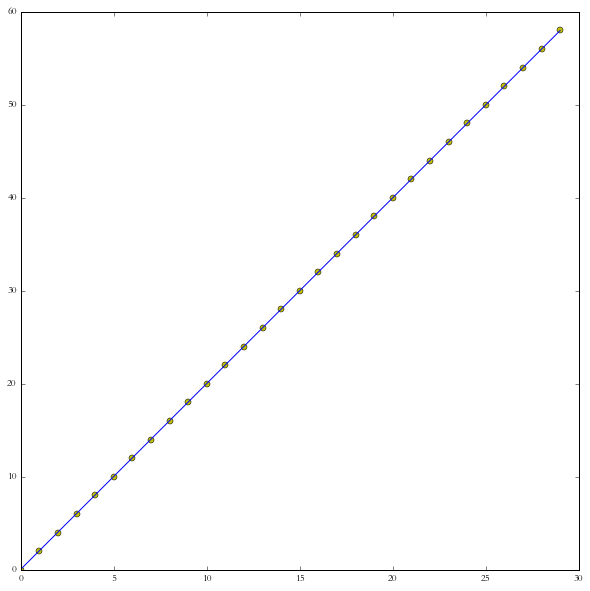

In [3]:
    import matplotlib.pyplot as plt
    X_n=np.arange(100).reshape(100,1)
    Y= X_n[:30]*2
    lr = LinearRegression()
    detail = lr.train_gb(X_n[:30],X_n[:30]*2,np.array([[0],[1]]),0.00001,35000)
    plt.figure(figsize=(10,10))
   
    plt.plot(X_n[:30],Y,'yo')
    plt.plot(X_n[:30],lr.predict(X_n[:30]))
    print detail
    
    
    
    #from sklearn import linear_model
    #sklr = linear_model.LinearRegression()
    #t = sklr.fit(X_n[:30],X_n[:30]*2)
    #print t.coef_
    #print t.intercept_
    #plt.plot(X_n[:30],sklr.predict(X_n[:30]),'y')
    

---
[[ 1.19303364]]
[-3.89578088]
---


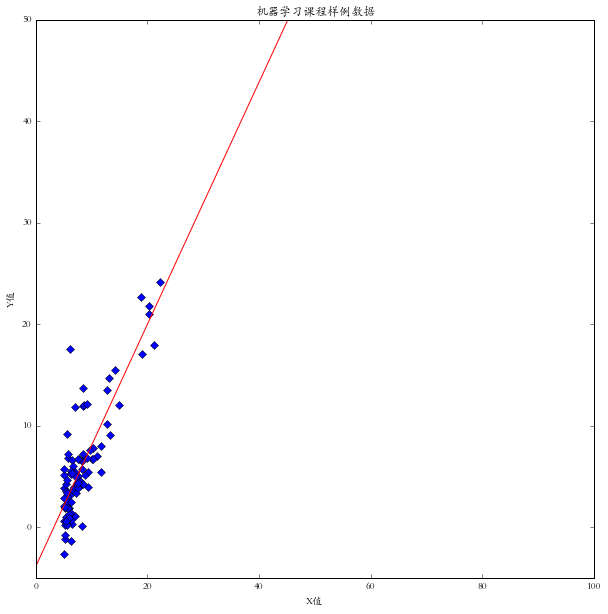

In [32]:
# -*- coding: utf-8 -*-  
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=np.loadtxt("./data/ex1data1.txt",delimiter=',')
plt.figure(figsize=(10,10))

#设置图表的标题
plt.title(u"机器学习课程样例数据")

plt.ylim(-5,50)
plt.xlim(0,100)
plt.plot(data[:,0],data[:,1],"bD")

plt.ylabel(u"Y值")
plt.xlabel(u"X值")


from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(data[:,0].reshape(-1, 1),data[:,1].reshape(-1, 1))
print '---'
print reg.coef_
print reg.intercept_
print '---'
x=np.arange(-5,50)
y=x*reg.coef_[0,0]+reg.intercept_
plt.plot(x,y,'r')
